# Assignment 3

## Question 1 — Delay Distribution by Mode
After our analysis in Question 5 of the second assignment, we now know that the delays between invoice and shipment dates are closely related to the specific transportation mode. Create a compelling visual of this finding with the following requirements:

A boxplot visualization of delay broken down by transportation mode (excluding NA values and the other categories), for which the boxplots are ordered based on delay (from largest delays to smallest delays)
Including refinements such as proper x- and y-axis titles and labels. You should also use a custom theme to increase your plot's data-to-ink ratio.

Once you have created your visual, save a PNG file of it (with appropriate width, height, and dpi) to a plots folder in your assignment. You may label this image as "delay_dist_by_mode.png".

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np 

df = pd.read_csv("../data/tr_data_22_24 (1).csv")
df

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165
...,...,...,...,...,...,...,...,...
208794,TH2E,less_container_load,B1A2,AMER,Dallas,2024-12-30,2025-03-08,56223.045037
208795,US77,std_air,F928,AMER,New York,2024-12-30,2025-01-04,288.275800
208796,TH2E,exp_air,F928,AMER,Dallas,2024-12-30,2025-01-04,5986.953427
208797,US77,exp_air,E174,AMER,New York,2024-12-30,2025-01-03,6010.693601


In [12]:

df['shipping_date'] = pd.to_datetime(df['shipping_date'])
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df['delay_days'] = (df['invoice_date'] - df['shipping_date']).dt.days

C:\Users\natas\AppData\Local\Temp\ipykernel_16404\2048018990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot,


(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'less_container_load'),
  Text(2, 0, 'full_container_load'),
  Text(3, 0, 'less_truck_load'),
  Text(4, 0, 'truck_load'),
  Text(5, 0, 'std_air'),
  Text(6, 0, 'exp_air'),
  Text(7, 0, 'parcel_grund'),
  Text(8, 0, 'parcel_air')])

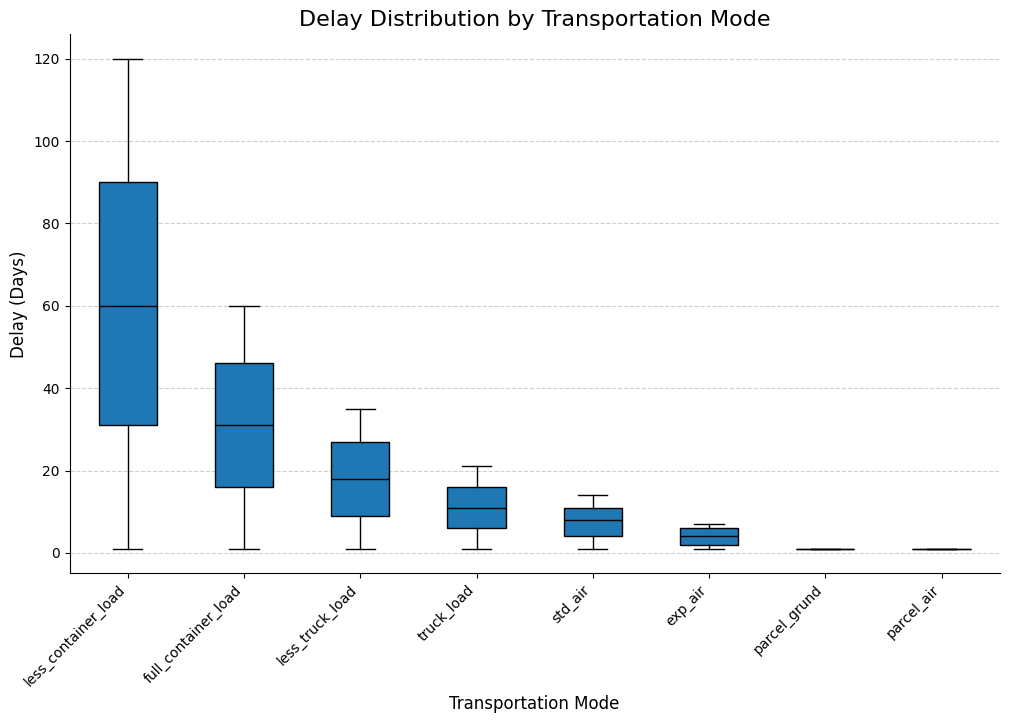

In [13]:
# --- Question 1: Delay Distribution by Mode ---

delay_dist = df[
    df['mode'].notna() & (df['mode'] != 'NA') & (df['mode'] != 'other')
].copy()

median_delays = delay_dist.groupby('mode')['delay_days'].median().sort_values(ascending=False)
sorted_modes = median_delays.index

data_to_plot = [delay_dist[delay_dist['mode'] == mode]['delay_days'].dropna().values 
                for mode in sorted_modes]

fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(data_to_plot, 
           labels=sorted_modes, 
           patch_artist=True, 
           medianprops=dict(color='black'))

ax.set_title("Delay Distribution by Transportation Mode", fontsize=16)
ax.set_xlabel("Transportation Mode", fontsize=12)
ax.set_ylabel("Delay (Days)", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')


In [14]:
# Correct path to the real plots folder (one level above notebooks)
plots_dir = "../plots"

os.makedirs(plots_dir, exist_ok=True)
print(f"Saving plot into: {plots_dir}")

plot_q1_file = os.path.join(plots_dir, "delay_dist_by_mode.png")

plt.tight_layout()
plt.savefig(plot_q1_file, dpi=300)
plt.close(fig)

print(f"Q1 Plot saved to: {plot_q1_file}")

Saving plot into: ../plots
Q1 Plot saved to: ../plots\delay_dist_by_mode.png


<Figure size 640x480 with 0 Axes>

## Question 2 - Invoice Time Series
With the delay distribution analysis complete, we can finally focus on the invoice time series data and investigate any possible patterns (seasonality, trend, or both) that might help us with our estimation and forecasting tasks.

Create a visualization of the time series of invoice amounts by shipping date. Explain why this initial visualization is not suitable for our analysis.

Suggest and create another visualization that performs better than the initial visualization. Hint: You may need to create small multiples to get a better picture of invoice time series data.

Once your exploration is complete, decide on a final visualization, refine it with proper x- and y-axis titles and labels, and apply a custom theme to increase your plot's data-to-ink ratio. Afterward, save a PNG file of your final visual (with appropriate width, height, and dpi) to the plots folder in your assignment.

In [18]:
# --- Question 2: Invoice Time Series ---

print("\nStarting Q2 Initial Plot...")

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['shipping_date'], df['usda_invoice_amount'], alpha=0.1, s=10)

ax.set_title("Initial View: Invoice Amounts by Shipping Date (All Modes)", fontsize=16)
ax.set_xlabel("Shipping Date", fontsize=12)
ax.set_ylabel("Invoice Amount (USDA)", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# -------------------------------
# FIX: Save to correct plots folder
# -------------------------------
plots_dir = "../plots"

plot_q2_initial_file = os.path.join(plots_dir, "invoice_timeseries_initial.png")
plt.tight_layout()
plt.savefig(plot_q2_initial_file, dpi=300)
plt.close(fig)

print(f"Q2 Initial Plot saved to: {plot_q2_initial_file}")



Starting Q2 Initial Plot...
Q2 Initial Plot saved to: ../plots\invoice_timeseries_initial.png


In [19]:
print("\nStarting Q2 Final Plot...")

df_q2 = df[
    df['mode'].notna() & (df['mode'] != 'NA') & (df['mode'] != 'other')
].copy()

# ensure dates are datetime
df_q2['shipping_date'] = pd.to_datetime(df_q2['shipping_date'])

# resample monthly mean invoice amount by mode
df_q2_resampled = (
    df_q2.set_index('shipping_date')
         .groupby('mode')['usda_invoice_amount']
         .resample('M')
         .mean()
         .reset_index()
)

modes = df_q2['mode'].unique()
n_modes = len(modes)



Starting Q2 Final Plot...


C:\Users\natas\AppData\Local\Temp\ipykernel_16404\578907394.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


In [20]:
mode_data = df_q2_resampled[df_q2_resampled['mode'] == mode]

## Question 3 -  Cost Estimation and Forecasting
What can you conclude regarding the existing time-series patterns in the invoice amounts? How can these patterns help estimate or forecast transportation costs? Do these patterns differ by transportation mode? Please be sure to elaborate on your response.

The following are my thoughts on time-series patterns and their predictive value, derived from the last (better) visualisation in Question 2:

Patterns do exist but they are very different depending on the method of transportation

- Trend: Some modes have a general pattern. For instance, the prices of exp_air and std_air seem to be going up a little bit over the course of three years. Alternately, other modes such as full container load and truck load don't seem to follow trend, but pivot towards uncertainty in cycles.

- Seasonality: In some modes, you can see clear seasonal trends. Truck load and less_truck_load both have substantial annual seasonality. Costs are always highest in the middle of the year (about June to August) and lowest at the beginning and end of the year. Full container load also shows seasonality, but in a different way. It peaks at the beginning of Q4 (October to November), which could be because of shipping before the holidays.

- Volatility: Some modes change a lot more than others. The air freight modes (exp_air, std_air, and parcel_air) have monthly averages that are spikier and more volatile than the smoother seasonal curves of terrestrial transport.

How may these patterns be useful?
- Estimation: We can make better long-term expense estimates by knowing the trend. For instance, when planning how much money we would need for next year's exp_air costs, we should choose a base cost that is a little higher than this year's average.

- Forecasting: By finding patterns in the seasons, we can make better short-term predictions. For instance, we now know that expenses for truck load reach its highest during the summer season but drop significantly in the winter. Using this information, we can now plan our monthly budget.

Do patterns change depending on the mode?
Yes, a lot. This is the most crucial thing to remember. It would be very wrong to use only one forecast model for "all" transportation.
- Ground (Trucks): This is because of strong, predictable changes in the seasons each year.
- Sea (Containers): There is some seasonality, but it is more volatile and happens at different times than ground.
- Air (Air/Parcel) has the least seasonality and the most volatility. Costs are more affected by short-term events and a little rising tendency.


## References

Google, personal communication, October 31, 2025

Hunter, J. D., & The Matplotlib Development Team. (2025). Matplotlib: Visualization with Python [Computer software]. https://matplotlib.org/

The pandas development team. (2025). pandas: powerful Python data analysis toolkit [Computer software]. https://pandas.pydata.org/

Python Software Foundation. (2025). Python [Computer software]. https://www.python.org/